# Data Project: World Deaths & Causes

## Utkarsh Paliwal & Jaeger Hessing

Utkarsh did the following:
- Set data restrictions to limit years, columns, and countries displayed (import, df.read, df.set, df.drop)
- Printed data row for row and used it to code future visualizations (row for row)
- Dropped non-countries (.drop)
- Made dictionary, for loop, and conditionals to check one of each country to prevent errors/repetitive data ({}, for, if, else)
- Made heatmap to display color-coded data with cells that are present/missing (sns.heatmap)
- Replaced NaN values with “not specified” to clean data (.fillna)
- One colored bar graph (sorting values, .head) & two pie charts (.loc to limit data shown, autopct, labeling)

Jaeger did the following:
- One bar graph (sorting values, .head, graph customization), one scatter plot, and one pie chart (making use of explode feature, labeling, autopct, axis)
- Object oriented programming 
	- Created class (death causes) 
	- Constructor to initialize object state (self, country, cause)
	- Made corresponding functions: general country statistics and global deaths by cause
	- Question that takes input from user to give relevant country statistics
- Adding comments/markdown throughout data analysis and code to explain both partners’ code
- Explanation of dataset (how we found data, why we chose the dataset)

Our project analyzes the top causes of death across the world, mainly during 2019. We cleaned the data, limited the type of data being manipulated, made visualizations (bar graphs, pie charts, and a scatter plot), and used object oriented programming to allow users to interact with the data. 

Dataset from kaggle.com: https://www.kaggle.com/datasets/madhurpant/world-deaths-and-causes-1990-2019?resource=download

Resources:
https://pandas.pydata.org/docs/user_guide/visualization.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
https://stackoverflow.com/questions/55883053/selecting-specific-rows-from-a-pandas-dataframe
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
https://matplotlib.org/stable/gallery/color/named_colors.html
https://www.dataquest.io/blog/plot-dataframe-pandas/

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#importing csv file
#importing pandas, matplotlib, and numpy modules


ad = pd.read_csv("annual_deaths_by_causes.csv", low_memory=False)
#ad means annual deaths
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 2639)
#increasing max amount of columns displayed

ad.drop(ad[(ad["year"] < 2019)].index, inplace=True)
ad.drop(ad[(ad["year"] > 2019)].index, inplace=True)
#limiting the year range to 2019

ad
#show updated csv data

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,maternal_disorders,hiv/aids,drug_use_disorders,tuberculosis,cardiovascular_diseases,lower_respiratory_infections,neonatal_disorders,alcohol_use_disorders,self_harm,exposure_to_forces_of_nature,diarrheal_diseases,environmental_heat_and_cold_exposure,neoplasms,conflict_and_terrorism,diabetes_mellitus,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
29,Afghanistan,AFG,2019,1563.0,1775.0,560.0,1244.0,530.0,1687.0,5015.0,4038.0,318.0,406.0,3627.0,61995.0,18697.0,23701.0,147.0,1613.0,128.0,4320.0,59.0,21247.0,24295.0,4817.0,5637.0,525.0,1210.0,NaN,8254.0,7082.0,3797.0,6929.0,485.0,1940.0
59,African Region (WHO),NaN,2019,139590.0,66124.0,15930.0,98704.0,590252.0,23768.0,79735.0,91905.0,635623.0,2703.0,369065.0,1085321.0,662060.0,749955.0,7261.0,69367.0,1642.0,576592.0,5391.0,533567.0,9519.0,170540.0,127158.0,18792.0,94780.0,NaN,182243.0,178908.0,187968.0,324066.0,23657.0,13950.0
89,Albania,ALB,2019,13.0,917.0,248.0,5.0,0.0,36.0,57.0,3.0,2.0,29.0,11.0,12904.0,457.0,161.0,18.0,152.0,51.0,7.0,4.0,4705.0,0.0,175.0,329.0,11.0,3.0,NaN,243.0,815.0,333.0,527.0,18.0,1.0
119,Algeria,DZA,2019,292.0,5209.0,1283.0,114.0,0.0,526.0,459.0,638.0,264.0,526.0,445.0,97931.0,5786.0,8756.0,111.0,1516.0,0.0,527.0,40.0,23816.0,13.0,5328.0,8201.0,351.0,92.0,NaN,11051.0,7528.0,4045.0,6398.0,782.0,259.0
149,American Samoa,ASM,2019,1.0,7.0,3.0,2.0,0.0,4.0,3.0,1.0,0.0,0.0,1.0,125.0,12.0,4.0,1.0,4.0,0.0,3.0,0.0,68.0,0.0,44.0,26.0,0.0,2.0,NaN,5.0,23.0,7.0,14.0,0.0,0.0
179,Andorra,AND,2019,0.0,36.0,7.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,169.0,20.0,0.0,1.0,8.0,0.0,1.0,0.0,230.0,0.0,9.0,16.0,0.0,0.0,NaN,8.0,39.0,12.0,27.0,0.0,1.0
209,Angola,AGO,2019,2520.0,1143.0,267.0,3015.0,10784.0,793.0,974.0,2069.0,16802.0,80.0,11752.0,25724.0,12783.0,18189.0,211.0,1928.0,30.0,12936.0,114.0,12791.0,16.0,4033.0,2464.0,433.0,2906.0,NaN,9253.0,3934.0,5666.0,8971.0,513.0,246.0
239,Antigua and Barbuda,ATG,2019,1.0,16.0,5.0,3.0,0.0,4.0,5.0,0.0,7.0,0.0,0.0,200.0,30.0,4.0,7.0,3.0,0.0,2.0,0.0,138.0,0.0,57.0,36.0,0.0,3.0,NaN,7.0,11.0,13.0,24.0,2.0,0.0
269,Argentina,ARG,2019,453.0,12045.0,3043.0,1330.0,0.0,566.0,2881.0,377.0,1777.0,86.0,727.0,101725.0,36264.0,3272.0,821.0,5029.0,0.0,757.0,45.0,85209.0,0.0,10762.0,15665.0,272.0,1255.0,NaN,6318.0,19348.0,8525.0,17792.0,672.0,36.0
299,Armenia,ARM,2019,5.0,873.0,169.0,4.0,0.0,44.0,153.0,8.0,19.0,10.0,73.0,13507.0,546.0,156.0,69.0,287.0,0.0,13.0,47.0,5834.0,0.0,1235.0,449.0,18.0,1.0,NaN,240.0,1323.0,1114.0,1720.0,45.0,2.0


In [2]:
with open("annual_deaths_by_causes.csv") as annual_deaths:
    ad_data = csv.reader(annual_deaths)
    ad_rows = [row for row in ad_data]
    
ad_rows

#prints rows of data, make analysis easier

[['country',
  'code',
  'year',
  'meningitis',
  "alzheimer's_diesease",
  "parkinson's_disease",
  'nutritional_deficiency',
  'malaria',
  'drowning',
  'interpersonal_violence',
  'maternal_disorders',
  'hiv/aids',
  'drug_use_disorders',
  'tuberculosis',
  'cardiovascular_diseases',
  'lower_respiratory_infections',
  'neonatal_disorders',
  'alcohol_use_disorders',
  'self_harm',
  'exposure_to_forces_of_nature',
  'diarrheal_diseases',
  'environmental_heat_and_cold_exposure',
  'neoplasms',
  'conflict_and_terrorism',
  'diabetes_mellitus',
  'chronic_kidney_disease',
  'poisonings',
  'protein_energy_malnutrition',
  'terrorism',
  'road_injuries',
  'chronic_respiratory_diseases',
  'chronic_liver_diseases',
  'digestive_diseases',
  'fire_heat_hot_substance',
  'acute_hepatitis'],
 ['Afghanistan',
  'AFG',
  '2007',
  '2933.0',
  '1402.0',
  '450.0',
  '2488.0',
  '393.0',
  '2127.0',
  '3657.0',
  '4990.0',
  '148.0',
  '252.0',
  '4995.0',
  '53962.0',
  '27672.0',
  '2

In [3]:
#non-country indexes: 59,1781,1844,2144,2174,2297,3348,3951,4489,4669,5089,5807,5897,6041,7002,7034,7074,7104,7134,7164

countries = ad.drop(index=[59,1781,1844,2144,2174,2297,3348,3951,4489,4669,5089,5807,5897,6041,7002,7034,7074,7104,7134,7164])
#removing non-countries such as world, G20, and world bank
countries
#updated data with countries in 2019

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,maternal_disorders,hiv/aids,drug_use_disorders,tuberculosis,cardiovascular_diseases,lower_respiratory_infections,neonatal_disorders,alcohol_use_disorders,self_harm,exposure_to_forces_of_nature,diarrheal_diseases,environmental_heat_and_cold_exposure,neoplasms,conflict_and_terrorism,diabetes_mellitus,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
29,Afghanistan,AFG,2019,1563.0,1775.0,560.0,1244.0,530.0,1687.0,5015.0,4038.0,318.0,406.0,3627.0,61995.0,18697.0,23701.0,147.0,1613.0,128.0,4320.0,59.0,21247.0,24295.0,4817.0,5637.0,525.0,1210.0,NaN,8254.0,7082.0,3797.0,6929.0,485.0,1940.0
89,Albania,ALB,2019,13.0,917.0,248.0,5.0,0.0,36.0,57.0,3.0,2.0,29.0,11.0,12904.0,457.0,161.0,18.0,152.0,51.0,7.0,4.0,4705.0,0.0,175.0,329.0,11.0,3.0,NaN,243.0,815.0,333.0,527.0,18.0,1.0
119,Algeria,DZA,2019,292.0,5209.0,1283.0,114.0,0.0,526.0,459.0,638.0,264.0,526.0,445.0,97931.0,5786.0,8756.0,111.0,1516.0,0.0,527.0,40.0,23816.0,13.0,5328.0,8201.0,351.0,92.0,NaN,11051.0,7528.0,4045.0,6398.0,782.0,259.0
149,American Samoa,ASM,2019,1.0,7.0,3.0,2.0,0.0,4.0,3.0,1.0,0.0,0.0,1.0,125.0,12.0,4.0,1.0,4.0,0.0,3.0,0.0,68.0,0.0,44.0,26.0,0.0,2.0,NaN,5.0,23.0,7.0,14.0,0.0,0.0
179,Andorra,AND,2019,0.0,36.0,7.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,169.0,20.0,0.0,1.0,8.0,0.0,1.0,0.0,230.0,0.0,9.0,16.0,0.0,0.0,NaN,8.0,39.0,12.0,27.0,0.0,1.0
209,Angola,AGO,2019,2520.0,1143.0,267.0,3015.0,10784.0,793.0,974.0,2069.0,16802.0,80.0,11752.0,25724.0,12783.0,18189.0,211.0,1928.0,30.0,12936.0,114.0,12791.0,16.0,4033.0,2464.0,433.0,2906.0,NaN,9253.0,3934.0,5666.0,8971.0,513.0,246.0
239,Antigua and Barbuda,ATG,2019,1.0,16.0,5.0,3.0,0.0,4.0,5.0,0.0,7.0,0.0,0.0,200.0,30.0,4.0,7.0,3.0,0.0,2.0,0.0,138.0,0.0,57.0,36.0,0.0,3.0,NaN,7.0,11.0,13.0,24.0,2.0,0.0
269,Argentina,ARG,2019,453.0,12045.0,3043.0,1330.0,0.0,566.0,2881.0,377.0,1777.0,86.0,727.0,101725.0,36264.0,3272.0,821.0,5029.0,0.0,757.0,45.0,85209.0,0.0,10762.0,15665.0,272.0,1255.0,NaN,6318.0,19348.0,8525.0,17792.0,672.0,36.0
299,Armenia,ARM,2019,5.0,873.0,169.0,4.0,0.0,44.0,153.0,8.0,19.0,10.0,73.0,13507.0,546.0,156.0,69.0,287.0,0.0,13.0,47.0,5834.0,0.0,1235.0,449.0,18.0,1.0,NaN,240.0,1323.0,1114.0,1720.0,45.0,2.0
356,Australia,AUS,2019,46.0,11240.0,2403.0,164.0,0.0,196.0,322.0,13.0,71.0,1128.0,95.0,51615.0,4269.0,487.0,590.0,2898.0,4.0,228.0,37.0,53700.0,0.0,4239.0,5207.0,43.0,136.0,NaN,1595.0,11203.0,2215.0,6632.0,109.0,10.0


In [4]:
#Checking if there is one of each country in 2019 to ensure no errors in future data analysis

country_checker = {}
# creates empty list for data to be input

checker = countries["country"]
# variable to loop through countries in dataset

for i in checker:
    if i not in country_checker:
        country_checker[i] = 1
    else:
        country_checker[i] += 1
    # loops through country list to ensure that there are no repeats in data
        
country_checker

{'Afghanistan': 1,
 'Albania': 1,
 'Algeria': 1,
 'American Samoa': 1,
 'Andorra': 1,
 'Angola': 1,
 'Antigua and Barbuda': 1,
 'Argentina': 1,
 'Armenia': 1,
 'Australia': 1,
 'Austria': 1,
 'Azerbaijan': 1,
 'Bahamas': 1,
 'Bahrain': 1,
 'Bangladesh': 1,
 'Barbados': 1,
 'Belarus': 1,
 'Belgium': 1,
 'Belize': 1,
 'Benin': 1,
 'Bermuda': 1,
 'Bhutan': 1,
 'Bolivia': 1,
 'Bosnia and Herzegovina': 1,
 'Botswana': 1,
 'Brazil': 1,
 'Brunei': 1,
 'Bulgaria': 1,
 'Burkina Faso': 1,
 'Burundi': 1,
 'Cambodia': 1,
 'Cameroon': 1,
 'Canada': 1,
 'Cape Verde': 1,
 'Central African Republic': 1,
 'Chad': 1,
 'Chile': 1,
 'China': 1,
 'Colombia': 1,
 'Comoros': 1,
 'Congo': 1,
 'Cook Islands': 1,
 'Costa Rica': 1,
 "Cote d'Ivoire": 1,
 'Croatia': 1,
 'Cuba': 1,
 'Cyprus': 1,
 'Czechia': 1,
 'Democratic Republic of Congo': 1,
 'Denmark': 1,
 'Djibouti': 1,
 'Dominica': 1,
 'Dominican Republic': 1,
 'Ecuador': 1,
 'Egypt': 1,
 'El Salvador': 1,
 'England': 1,
 'Equatorial Guinea': 1,
 'Eritrea': 

<AxesSubplot:>

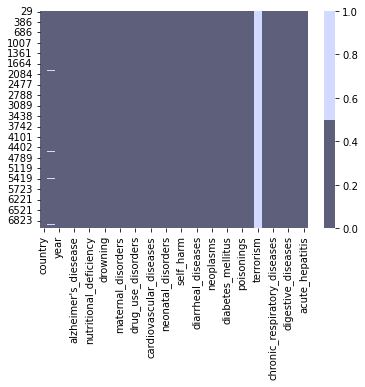

In [5]:
#Heatmap
#displays color-coded data that is present and missing

import seaborn as sns
#importing seaborn library

cols = countries.columns[:500] 
#first 500 columns
colors = ['#5d5f7b','#d2daff'] 
#hex codes (light blue missing, dark blue present)

sns.heatmap(countries[cols].isnull(), cmap=sns.color_palette(colors)) 

In [6]:
countries["terrorism"] = countries["terrorism"].fillna("not specified") 
#replacing NaN values in terrorism column with "not specified"
countries

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,maternal_disorders,hiv/aids,drug_use_disorders,tuberculosis,cardiovascular_diseases,lower_respiratory_infections,neonatal_disorders,alcohol_use_disorders,self_harm,exposure_to_forces_of_nature,diarrheal_diseases,environmental_heat_and_cold_exposure,neoplasms,conflict_and_terrorism,diabetes_mellitus,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
29,Afghanistan,AFG,2019,1563.0,1775.0,560.0,1244.0,530.0,1687.0,5015.0,4038.0,318.0,406.0,3627.0,61995.0,18697.0,23701.0,147.0,1613.0,128.0,4320.0,59.0,21247.0,24295.0,4817.0,5637.0,525.0,1210.0,not specified,8254.0,7082.0,3797.0,6929.0,485.0,1940.0
89,Albania,ALB,2019,13.0,917.0,248.0,5.0,0.0,36.0,57.0,3.0,2.0,29.0,11.0,12904.0,457.0,161.0,18.0,152.0,51.0,7.0,4.0,4705.0,0.0,175.0,329.0,11.0,3.0,not specified,243.0,815.0,333.0,527.0,18.0,1.0
119,Algeria,DZA,2019,292.0,5209.0,1283.0,114.0,0.0,526.0,459.0,638.0,264.0,526.0,445.0,97931.0,5786.0,8756.0,111.0,1516.0,0.0,527.0,40.0,23816.0,13.0,5328.0,8201.0,351.0,92.0,not specified,11051.0,7528.0,4045.0,6398.0,782.0,259.0
149,American Samoa,ASM,2019,1.0,7.0,3.0,2.0,0.0,4.0,3.0,1.0,0.0,0.0,1.0,125.0,12.0,4.0,1.0,4.0,0.0,3.0,0.0,68.0,0.0,44.0,26.0,0.0,2.0,not specified,5.0,23.0,7.0,14.0,0.0,0.0
179,Andorra,AND,2019,0.0,36.0,7.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,169.0,20.0,0.0,1.0,8.0,0.0,1.0,0.0,230.0,0.0,9.0,16.0,0.0,0.0,not specified,8.0,39.0,12.0,27.0,0.0,1.0
209,Angola,AGO,2019,2520.0,1143.0,267.0,3015.0,10784.0,793.0,974.0,2069.0,16802.0,80.0,11752.0,25724.0,12783.0,18189.0,211.0,1928.0,30.0,12936.0,114.0,12791.0,16.0,4033.0,2464.0,433.0,2906.0,not specified,9253.0,3934.0,5666.0,8971.0,513.0,246.0
239,Antigua and Barbuda,ATG,2019,1.0,16.0,5.0,3.0,0.0,4.0,5.0,0.0,7.0,0.0,0.0,200.0,30.0,4.0,7.0,3.0,0.0,2.0,0.0,138.0,0.0,57.0,36.0,0.0,3.0,not specified,7.0,11.0,13.0,24.0,2.0,0.0
269,Argentina,ARG,2019,453.0,12045.0,3043.0,1330.0,0.0,566.0,2881.0,377.0,1777.0,86.0,727.0,101725.0,36264.0,3272.0,821.0,5029.0,0.0,757.0,45.0,85209.0,0.0,10762.0,15665.0,272.0,1255.0,not specified,6318.0,19348.0,8525.0,17792.0,672.0,36.0
299,Armenia,ARM,2019,5.0,873.0,169.0,4.0,0.0,44.0,153.0,8.0,19.0,10.0,73.0,13507.0,546.0,156.0,69.0,287.0,0.0,13.0,47.0,5834.0,0.0,1235.0,449.0,18.0,1.0,not specified,240.0,1323.0,1114.0,1720.0,45.0,2.0
356,Australia,AUS,2019,46.0,11240.0,2403.0,164.0,0.0,196.0,322.0,13.0,71.0,1128.0,95.0,51615.0,4269.0,487.0,590.0,2898.0,4.0,228.0,37.0,53700.0,0.0,4239.0,5207.0,43.0,136.0,not specified,1595.0,11203.0,2215.0,6632.0,109.0,10.0


In [7]:
deaths = countries.loc[:, ~countries.columns.isin(['code','year'])]
#Removing year and code columns to focus only on the deaths per country. We know the year (2019).
deaths

,country,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,maternal_disorders,hiv/aids,drug_use_disorders,tuberculosis,cardiovascular_diseases,lower_respiratory_infections,neonatal_disorders,alcohol_use_disorders,self_harm,exposure_to_forces_of_nature,diarrheal_diseases,environmental_heat_and_cold_exposure,neoplasms,conflict_and_terrorism,diabetes_mellitus,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
29,Afghanistan,1563.0,1775.0,560.0,1244.0,530.0,1687.0,5015.0,4038.0,318.0,406.0,3627.0,61995.0,18697.0,23701.0,147.0,1613.0,128.0,4320.0,59.0,21247.0,24295.0,4817.0,5637.0,525.0,1210.0,not specified,8254.0,7082.0,3797.0,6929.0,485.0,1940.0
89,Albania,13.0,917.0,248.0,5.0,0.0,36.0,57.0,3.0,2.0,29.0,11.0,12904.0,457.0,161.0,18.0,152.0,51.0,7.0,4.0,4705.0,0.0,175.0,329.0,11.0,3.0,not specified,243.0,815.0,333.0,527.0,18.0,1.0
119,Algeria,292.0,5209.0,1283.0,114.0,0.0,526.0,459.0,638.0,264.0,526.0,445.0,97931.0,5786.0,8756.0,111.0,1516.0,0.0,527.0,40.0,23816.0,13.0,5328.0,8201.0,351.0,92.0,not specified,11051.0,7528.0,4045.0,6398.0,782.0,259.0
149,American Samoa,1.0,7.0,3.0,2.0,0.0,4.0,3.0,1.0,0.0,0.0,1.0,125.0,12.0,4.0,1.0,4.0,0.0,3.0,0.0,68.0,0.0,44.0,26.0,0.0,2.0,not specified,5.0,23.0,7.0,14.0,0.0,0.0
179,Andorra,0.0,36.0,7.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,169.0,20.0,0.0,1.0,8.0,0.0,1.0,0.0,230.0,0.0,9.0,16.0,0.0,0.0,not specified,8.0,39.0,12.0,27.0,0.0,1.0
209,Angola,2520.0,1143.0,267.0,3015.0,10784.0,793.0,974.0,2069.0,16802.0,80.0,11752.0,25724.0,12783.0,18189.0,211.0,1928.0,30.0,12936.0,114.0,12791.0,16.0,4033.0,2464.0,433.0,2906.0,not specified,9253.0,3934.0,5666.0,8971.0,513.0,246.0
239,Antigua and Barbuda,1.0,16.0,5.0,3.0,0.0,4.0,5.0,0.0,7.0,0.0,0.0,200.0,30.0,4.0,7.0,3.0,0.0,2.0,0.0,138.0,0.0,57.0,36.0,0.0,3.0,not specified,7.0,11.0,13.0,24.0,2.0,0.0
269,Argentina,453.0,12045.0,3043.0,1330.0,0.0,566.0,2881.0,377.0,1777.0,86.0,727.0,101725.0,36264.0,3272.0,821.0,5029.0,0.0,757.0,45.0,85209.0,0.0,10762.0,15665.0,272.0,1255.0,not specified,6318.0,19348.0,8525.0,17792.0,672.0,36.0
299,Armenia,5.0,873.0,169.0,4.0,0.0,44.0,153.0,8.0,19.0,10.0,73.0,13507.0,546.0,156.0,69.0,287.0,0.0,13.0,47.0,5834.0,0.0,1235.0,449.0,18.0,1.0,not specified,240.0,1323.0,1114.0,1720.0,45.0,2.0
356,Australia,46.0,11240.0,2403.0,164.0,0.0,196.0,322.0,13.0,71.0,1128.0,95.0,51615.0,4269.0,487.0,590.0,2898.0,4.0,228.0,37.0,53700.0,0.0,4239.0,5207.0,43.0,136.0,not specified,1595.0,11203.0,2215.0,6632.0,109.0,10.0


<AxesSubplot:title={'center':'Top 10 Countries for Interpersonal Violence Deaths'}, xlabel='country'>

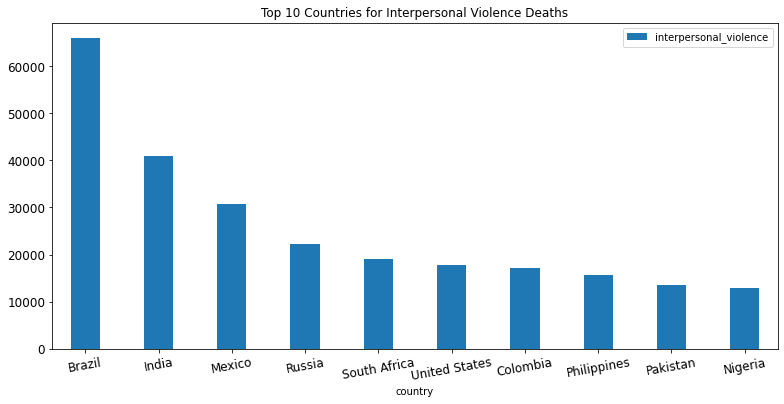

In [8]:
#Bar Graph
#Top 10 countries with most interpersonal violence deaths

top10_ipv = countries.sort_values(by="interpersonal_violence", ascending=False).head(10)
# stores 10 countries with highest death due to interpersonal violence

top10_ipv.plot(x="country", y="interpersonal_violence", kind="bar", 
               rot=10, fontsize=12, width = 0.4, figsize=(13,6),
               title="Top 10 Countries for Interpersonal Violence Deaths")
# creates bar graph

<AxesSubplot:title={'center':'Top 10 Countries for Conflict & Terrorism Deaths'}, xlabel='country'>

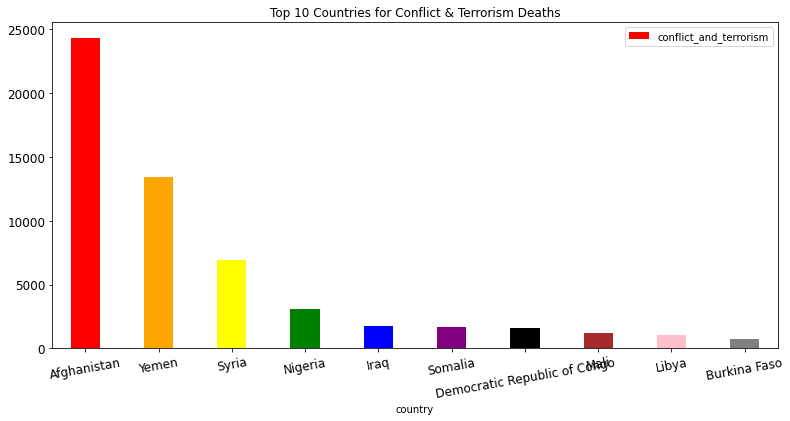

In [9]:
#Bar Graph - Colored
#Top 10 countries with most conflict and terrorism deaths

top10_ct = countries.sort_values(by="conflict_and_terrorism", ascending=False).head(10)
#stores top 10 countries based on conflict and terrorism deaths

top10_ct.plot(x="country", y="conflict_and_terrorism", kind="bar", rot=10, fontsize=12, 
              width = 0.4, figsize=(13,6),color=("red","orange","yellow","green","blue","purple","black","brown","pink","gray"),
              title="Top 10 Countries for Conflict & Terrorism Deaths")
# creates bar graph

<AxesSubplot:xlabel='interpersonal_violence', ylabel='conflict_and_terrorism'>

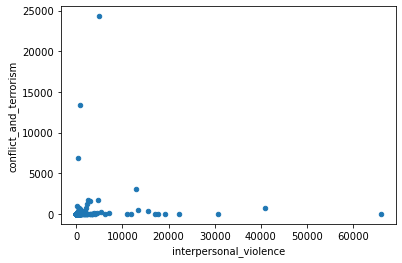

In [10]:
#Scatter Plot
#Comparing interpersonal violence and conflict & terrorism (2019)

countries.plot(x="interpersonal_violence", y="conflict_and_terrorism", kind="scatter")

,country,self_harm
2848,India,195336.0
1271,China,121217.0
6733,United States,45349.0
5149,Russia,39040.0
3089,Japan,24773.0
4729,Pakistan,17688.0
5837,South Korea,14575.0
6643,Ukraine,13690.0
857,Brazil,13503.0
2417,Germany,11664.0


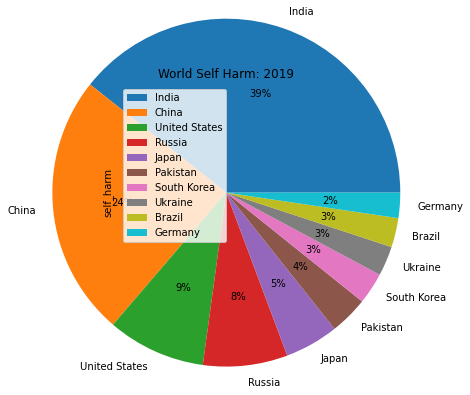

In [11]:
#Pie Chart
#Comparing percentages of self harm deaths by top 10 countries (2019)

sh = countries.loc[:,["country","self_harm"]]
#Only shows "country" and "self harm" columns

top10_sh = sh.sort_values(by="self_harm", ascending=False).head(10)
#stores top 10 countries by self harm deaths

labels = ["India","China","United States","Russia","Japan","Pakistan","South Korea",
          "Ukraine","Brazil","Germany"]
top10_sh.plot(kind="pie",y="self_harm",autopct="%1.0f%%",labels=labels,radius=2,title="World Self Harm: 2019")
top10_sh
#labels, creates, and returns pie chart for self harm

In [12]:
us_deaths = deaths.loc[6733]
us_deaths
#listing different causes of death and corresponding number in the United States (2019)

country                                 United States
meningitis                                     1146.0
alzheimer's_diesease                         143919.0
parkinson's_disease                           32211.0
nutritional_deficiency                         6090.0
malaria                                           0.0
drowning                                       3615.0
interpersonal_violence                        17709.0
maternal_disorders                              990.0
hiv/aids                                       7053.0
drug_use_disorders                            65717.0
tuberculosis                                    978.0
cardiovascular_diseases                      957455.0
lower_respiratory_infections                  81921.0
neonatal_disorders                            10994.0
alcohol_use_disorders                         14044.0
self_harm                                     45349.0
exposure_to_forces_of_nature                    105.0
diarrheal_diseases          

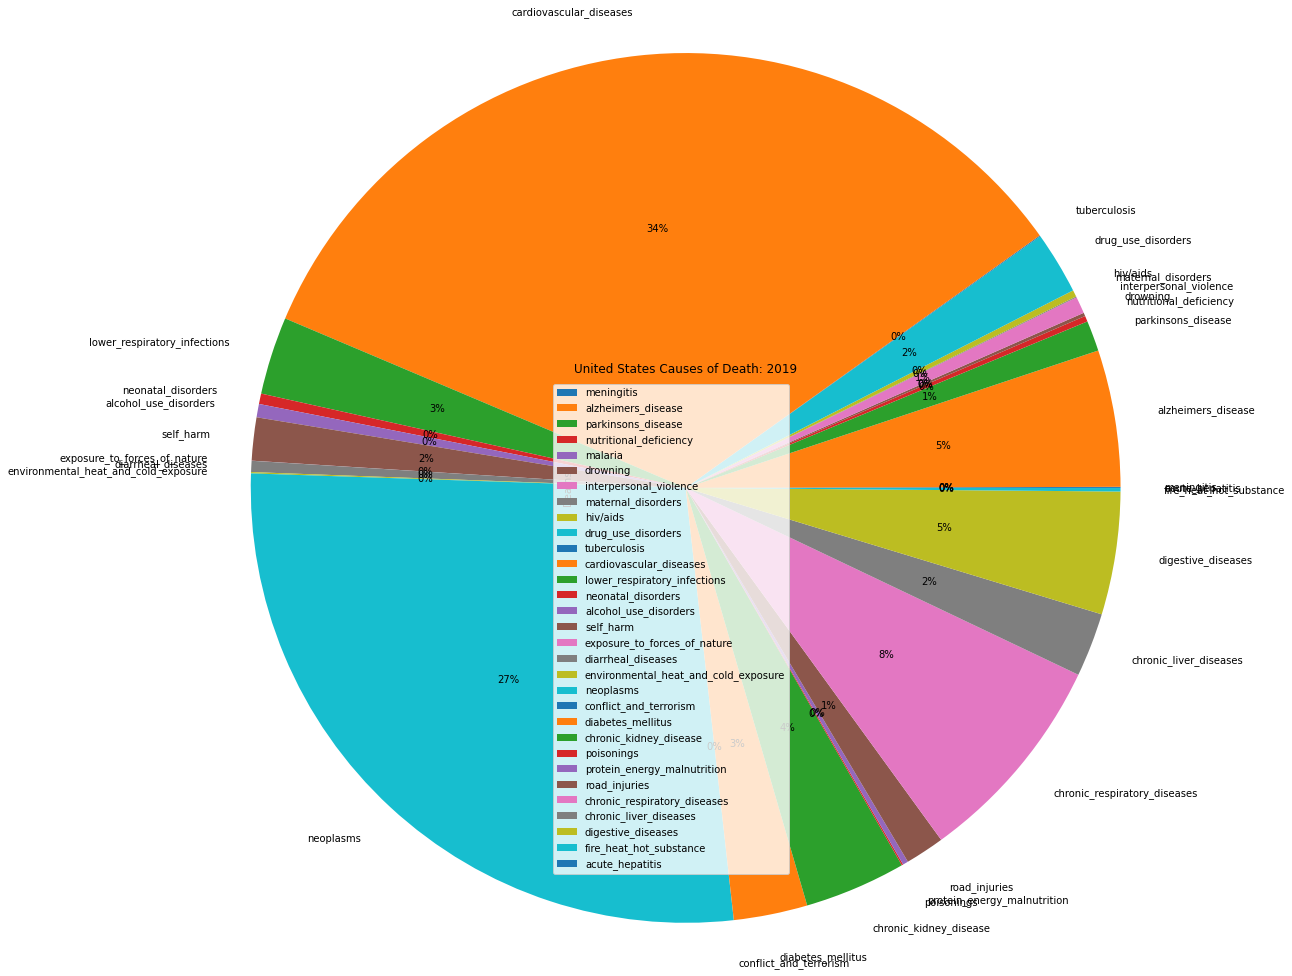

In [13]:
#Pie Chart
#displaying top causes of death in United States (2019)

data = {'Deaths': [1146.0, 143919.0, 32211.0, 6090.0, 0.0, 3615.0, 17709.0, 990.0, 7053.0, 
                   65717.0, 978.0, 957455.0, 81921.0, 10994.0, 14044.0, 45349.0, 105.0, 
                   11727.0, 1378.0, 773895.0, 31.0, 77719.0, 106954.0, 1528.0, 5710.0, 41362.0, 
                   224988.0, 67286.0, 129343.0, 3616.0, 131.0]}
#stores death counts respective to causes

df = pd.DataFrame(data, index=['meningitis', 'alzheimers_disease', 'parkinsons_disease', 
                               'nutritional_deficiency', 'malaria', 'drowning', 'interpersonal_violence',
                               'maternal_disorders', 'hiv/aids', 'drug_use_disorders', 'tuberculosis', 
                               'cardiovascular_diseases', 'lower_respiratory_infections', 'neonatal_disorders',
                               'alcohol_use_disorders', 'self_harm', 'exposure_to_forces_of_nature', 
                               'diarrheal_diseases', 'environmental_heat_and_cold_exposure', 'neoplasms', 
                               'conflict_and_terrorism', 'diabetes_mellitus', 'chronic_kidney_disease',
                               'poisonings', 'protein_energy_malnutrition','road_injuries', 
                               'chronic_respiratory_diseases', 'chronic_liver_diseases', 'digestive_diseases', 
                               'fire_heat_hot_substance', 'acute_hepatitis'])
# stores causes of death

df.plot.pie(y='Deaths', radius=5, legend=True,title='United States Causes of Death: 2019',autopct="%1.0f%%")
plt.show()
#creates and returns pie chart based on data 

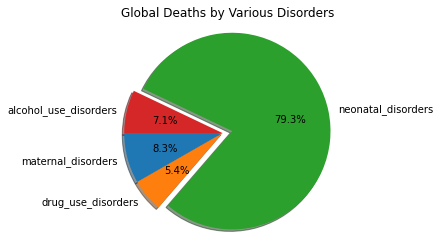

In [14]:
# Pie Chart 
#Comparing deaths from various disorders globally

labels = 'maternal_disorders', 'drug_use_disorders', 'neonatal_disorders', 'alcohol_use_disorders'
# assigns names of labels, corresponds with causes of death

numbers = 196471.0, 128083.0, 1882438.0, 168015.0
# assigns global death counts to respective cause

explode = (0,0,0.1,0)
# causes wedges to stand out

fig1, ax1 = plt.subplots()
ax1.pie(numbers, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
ax1.axis('equal')
# puts together aspects to create pie chart

plt.title("Global Deaths by Various Disorders")
# titles chart

plt.show()
# returns the completed chart

In [15]:
class death_causes:
# creates class for causes of death
    def __init__(self, country, cause):
    #initializes variables
        self.country = country
        self.cause = cause
        
    def gen_stats(self):
    # takes country input and returns stats for given country
        row = ad[ad['country'] == self.country].index.to_numpy()
        stats = ad.loc[row]
        print(stats)
        print("...")
        print("...")
        # provides spacing to make information easier to read
        
    def global_deaths(self):
    # returns global deaths based on cause
        print(ad.loc[7034][self.cause], "people died globally from", self.cause, "in 2019")
        print("...")
        print("...")
        # provides spacing

        
cntry = input("What country are you interested in? ")
# allows user to select which country's stats are displayed
cntry = cntry.title()
# ensures that input matches how countries are labeled in dataset

d1 = death_causes(cntry, "meningitis")
# instance variable with user country input and meningitis

d1.gen_stats()
d1.global_deaths()
# uses instance variable to run through the class

d2 = death_causes("New Zealand", "road_injuries")
# another instance variable example

d2.gen_stats()
d2.global_deaths()

What country are you interested in? China
     country code  year  meningitis  alzheimer's_diesease  \
1271   China  CHN  2019      6465.0              320715.0   

      parkinson's_disease  nutritional_deficiency  malaria  drowning  \
1271              76990.0                 16863.0      0.0   56524.0   

      interpersonal_violence  maternal_disorders  hiv/aids  \
1271                 11970.0              1537.0   31746.0   

      drug_use_disorders  tuberculosis  cardiovascular_diseases  \
1271             11445.0       36566.0                4584273.0   

      lower_respiratory_infections  neonatal_disorders  alcohol_use_disorders  \
1271                      185264.0             44950.0                19459.0   

      self_harm  exposure_to_forces_of_nature  diarrheal_diseases  \
1271   121217.0                         295.0              5440.0   

      environmental_heat_and_cold_exposure  neoplasms  conflict_and_terrorism  \
1271                                4966.0  271